#IS 470 Lab 10: Improving Model Performance

---
You have been given a data file by the San Francisco Bay Area Rapid Transit (BART), which identifies a set of demographics for residents in a local area. We will use this file to predict whether a resident is Rider or not.<br>
<br>
VARIABLE DESCRIPTIONS:<br>
<br>
Age:  

            1.   14 thru 17
            2.   18 thru 24
            3.   25 thru 34
            4.   35 thru 44
            5.   45 thru 54
            6.   55 thru 64
            7.   65 and Over

DistToWork: Distance to work in miles<br>
DualInc: Is dual income household or not<br>
Education:  
            
            1. Grade 8 or less<br>
            2. Grades 9 to 11<br>
            3. Graduated high school<br>
            4. 1 to 3 years of college<br>
            5. College graduate<br>
            6. Grad Study<br>
Gender:	M or F<br>
Income: 
        
            1. Less than $10,000<br>
            2. $10,000 to $14,999<br>
            3. $15,000 to $19,999<br>
            4. $20,000 to $24,999<br>
            5. $25,000 to $29,999<br>
            6. $30,000 to $39,999<br>
            7. $40,000 to $49,999<br>
            8. $50,000 to $74,999<br>
            9. $75,000 or more<br>
Language:	Language spoken at home<br>
NbrInHouseHold:	Number in household<br>
NbrInHouseholdUnder18:	Number in household under 18 years old<br>
OwnRent:	Own, rent, or live with parents<br>
YrsInArea:	Years lived in bay area<br>
Rider:	No, Non-rider; Yes, Rider<br>
<br>
Target variable: **Rider**

###1. Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BartRider.csv to BartRider.csv
User uploaded file "BartRider.csv" with length 199121 bytes


In [ ]:
# Import libraries
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Read data
BartRider = pd.read_csv("BartRider.csv")
BartRider

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,Y,4,M,5,English,2,0,Own,5,Yes
5489,4,9,Y,3,F,6,English,3,1,Rent,2,Yes
5490,2,7,N,4,M,2,English,1,1,Rent,1,Yes
5491,3,7,Y,3,F,9,English,2,0,Own,5,No


In [ ]:
# Show the head rows of a data frame
BartRider.head()

,Age,DistToWork,DualInc,Education,Gender,Income,Language,NbrInHouseHold,NbrInHouseholdUnder18,OwnRent,YrsInArea,Rider
0,7,14,N,3,F,3,English,1,0,Rent,5,Yes
1,7,10,N,5,M,8,English,2,0,Own,5,No
2,3,9,N,3,M,1,English,1,0,Rent,5,Yes
3,1,13,N,2,M,1,English,5,3,Parent,5,Yes
4,3,14,N,5,F,2,English,3,1,Parent,5,Yes


In [ ]:
# Examine variable type
BartRider.dtypes

Age                       int64
DistToWork                int64
DualInc                  object
Education                 int64
Gender                   object
Income                    int64
Language                 object
NbrInHouseHold            int64
NbrInHouseholdUnder18     int64
OwnRent                  object
YrsInArea                 int64
Rider                    object
dtype: object

In [ ]:
# Change categorical variables to "category"
BartRider['DualInc'] = BartRider['DualInc'].astype('category')
BartRider['Gender'] = BartRider['Gender'].astype('category')
BartRider['Language'] = BartRider['Language'].astype('category')
BartRider['OwnRent'] = BartRider['OwnRent'].astype('category')
BartRider['Rider'] = BartRider['Rider'].astype('category')

In [ ]:
# Examine variable type
BartRider.dtypes

Age                         int64
DistToWork                  int64
DualInc                  category
Education                   int64
Gender                   category
Income                      int64
Language                 category
NbrInHouseHold              int64
NbrInHouseholdUnder18       int64
OwnRent                  category
YrsInArea                   int64
Rider                    category
dtype: object

###2. Prepare data set for classification

In [ ]:
# Create dummy variables
BartRider = pd.get_dummies(BartRider, columns=['DualInc','Gender','Language','OwnRent'], drop_first=True)
BartRider

,Age,DistToWork,Education,Income,NbrInHouseHold,NbrInHouseholdUnder18,YrsInArea,Rider,DualInc_Y,Gender_M,Language_Other,Language_Spanish,OwnRent_Parent,OwnRent_Rent
0,7,14,3,3,1,0,5,Yes,0,0,0,0,0,1
1,7,10,5,8,2,0,5,No,0,1,0,0,0,0
2,3,9,3,1,1,0,5,Yes,0,1,0,0,0,1
3,1,13,2,1,5,3,5,Yes,0,1,0,0,1,0
4,3,14,5,2,3,1,5,Yes,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,3,11,4,5,2,0,5,Yes,1,1,0,0,0,0
5489,4,9,3,6,3,1,2,Yes,1,0,0,0,0,1
5490,2,7,4,2,1,1,1,Yes,0,1,0,0,0,1
5491,3,7,3,9,2,0,5,No,1,0,0,0,0,0


In [ ]:
# Partition the data
target = BartRider['Rider']
predictors = BartRider.drop(['Rider'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(3845, 13) (1648, 13) (3845,) (1648,)


In [ ]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

No     0.579714
Yes    0.420286
Name: Rider, dtype: float64


In [ ]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.552184
Yes    0.447816
Name: Rider, dtype: float64


## 3. Decision Tree model prediction

In [ ]:
# Build a decision tree model on training data with max_depth = 3, set random_state = 1.
model = DecisionTreeClassifier(criterion= 'entropy', max_depth=3, random_state=1)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(837.0, 951.3000000000001, 'Income <= 4.5\nentropy = 0.982\nsamples = 3845\nvalue = [2229, 1616]\nclass = No'),
 Text(418.5, 679.5, 'OwnRent_Parent <= 0.5\nentropy = 0.721\nsamples = 1562\nvalue = [312, 1250]\nclass = Yes'),
 Text(209.25, 407.70000000000005, 'Income <= 3.5\nentropy = 0.912\nsamples = 846\nvalue = [277, 569]\nclass = Yes'),
 Text(104.625, 135.89999999999998, 'entropy = 0.798\nsamples = 575\nvalue = [139, 436]\nclass = Yes'),
 Text(313.875, 135.89999999999998, 'entropy = 1.0\nsamples = 271\nvalue = [138, 133]\nclass = No'),
 Text(627.75, 407.70000000000005, 'Age <= 2.5\nentropy = 0.282\nsamples = 716\nvalue = [35, 681]\nclass = Yes'),
 Text(523.125, 135.89999999999998, 'entropy = 0.124\nsamples = 647\nvalue = [11, 636]\nclass = Yes'),
 Text(732.375, 135.89999999999998, 'entropy = 0.932\nsamples = 69\nvalue = [24, 45]\nclass = Yes'),
 Text(1255.5, 679.5, 'OwnRent_Parent <= 0.5\nentropy = 0.635\nsamples = 2283\nvalue = [1917, 366]\nclass = No'),
 Text(1046.25, 407.700

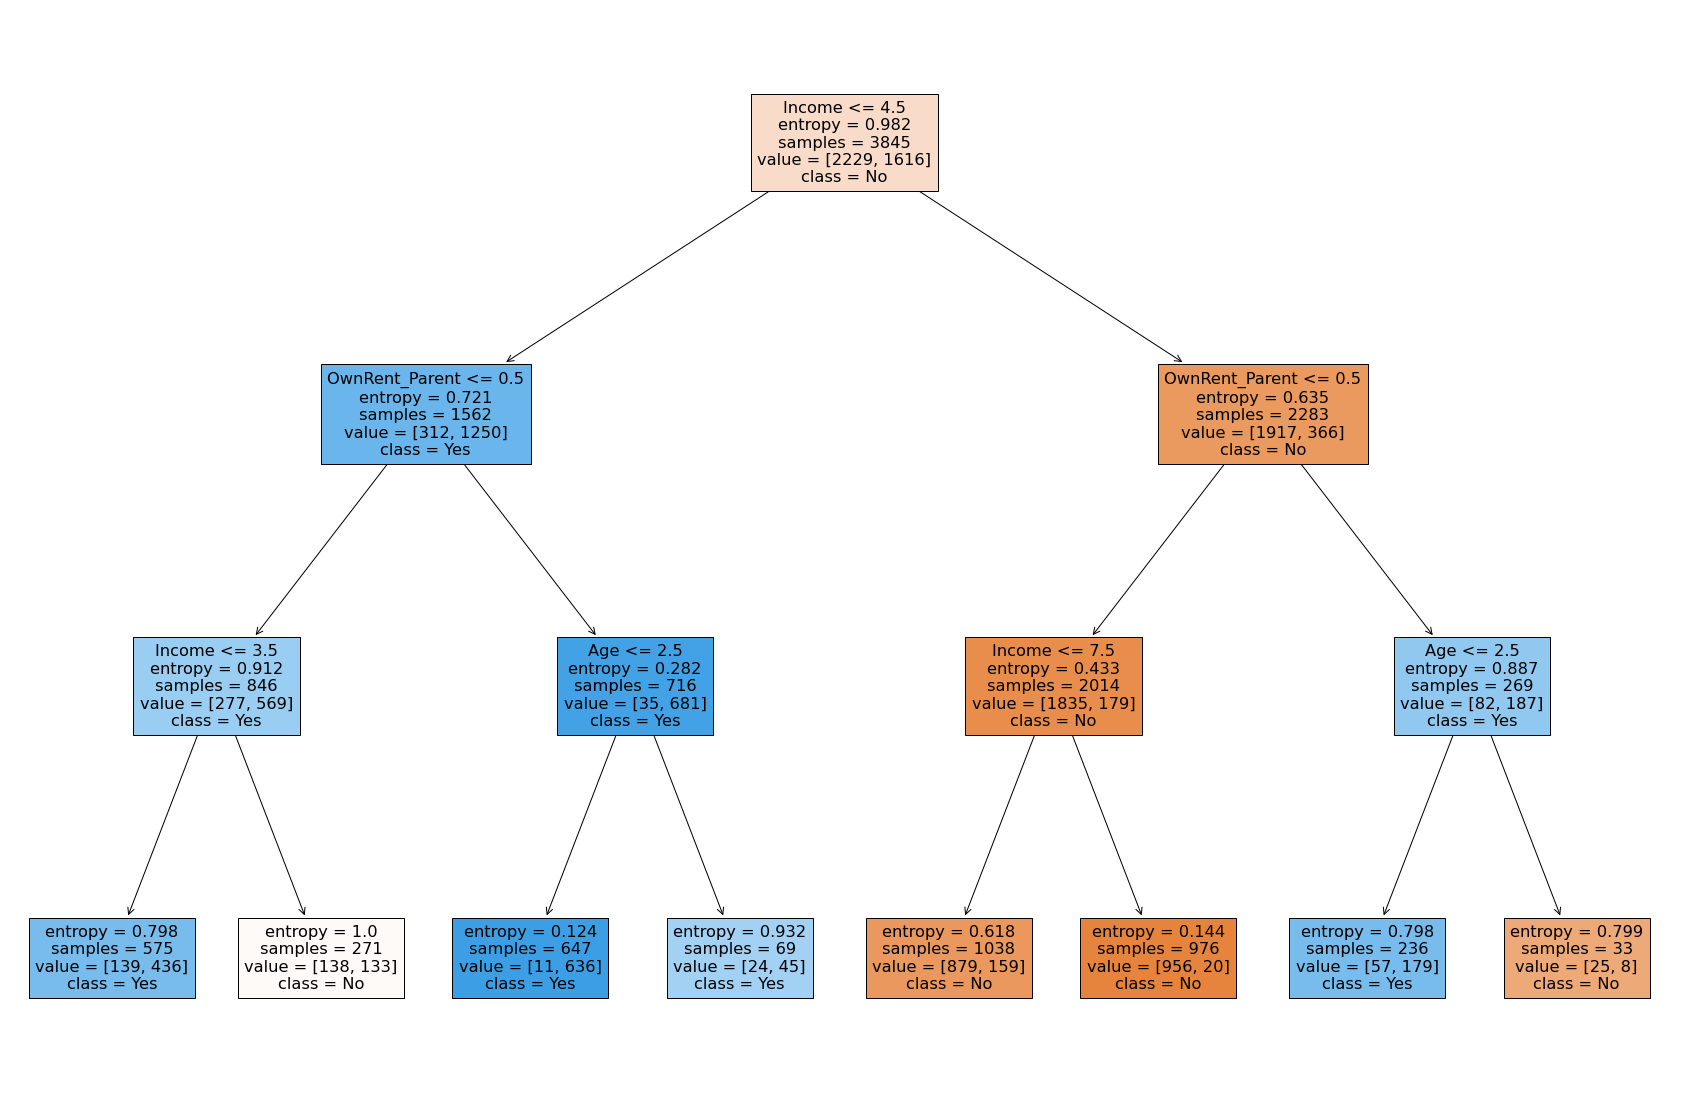

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model, feature_names= list(predictors_train.columns), class_names=['No', 'Yes'], filled= True)

In [ ]:
# Make predictions on testing data
prediction_on_test= model.predict(predictors_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


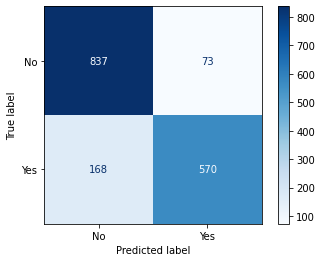

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87       910
         Yes       0.89      0.77      0.83       738

    accuracy                           0.85      1648
   macro avg       0.86      0.85      0.85      1648
weighted avg       0.86      0.85      0.85      1648



## 4. Voting ensemble prediction

In [ ]:
# Create three learners: one decision tree model and two SVM models with C =1 and C=5.
classifier_list = []
learner_1 = DecisionTreeClassifier(criterion= 'entropy', max_depth=3, random_state=1)
learner_2 = SVC(C=1)
learner_3 = SVC(C=5)
classifier_list.append(("Decision_Tree", learner_1))
classifier_list.append(("SVM1", learner_2))
classifier_list.append(("SVM2", learner_3))

In [ ]:
# Create a voting model
model_voting = VotingClassifier(classifier_list)
model_voting.fit(predictors_train, target_train)

VotingClassifier(estimators=[('Decision_Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     random_state=1)),
                             ('SVM1', SVC(C=1)), ('SVM2', SVC(C=5))])

In [ ]:
# Make predictions on testing data
prediction_on_test= model_voting.predict(predictors_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


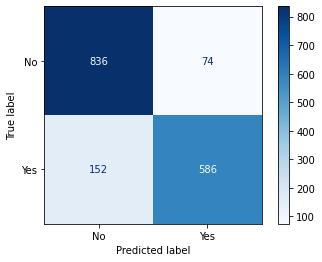

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model_voting, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.85      0.92      0.88       910
         Yes       0.89      0.79      0.84       738

    accuracy                           0.86      1648
   macro avg       0.87      0.86      0.86      1648
weighted avg       0.86      0.86      0.86      1648



## 5. Bagging ensemble prediction

In [ ]:
# Bagging based on decision tree model
model_bagging = BaggingClassifier(base_estimator= DecisionTreeClassifier(criterion= 'entropy', max_depth=3, random_state=1), n_estimators=20, random_state=1)
model_bagging.fit(predictors_train, target_train)
                              

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=3,
                                                        random_state=1),
                  n_estimators=20, random_state=1)

In [ ]:
# Make predictions on testing data
prediction_on_test= model_bagging.predict(predictors_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


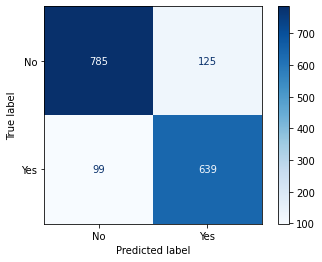

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model_bagging, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.89      0.86      0.88       910
         Yes       0.84      0.87      0.85       738

    accuracy                           0.86      1648
   macro avg       0.86      0.86      0.86      1648
weighted avg       0.86      0.86      0.86      1648



## 6. Boosting ensemble prediction

In [ ]:
# Bagging based on decision tree model
model_boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion= 'entropy', max_depth=3, random_state=1), n_estimators=10, random_state=1)
model_boosting.fit(predictors_train, target_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=1),
                   n_estimators=10, random_state=1)

In [ ]:
# Make predictions on testing data
prediction_on_test= model_boosting.predict(predictors_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


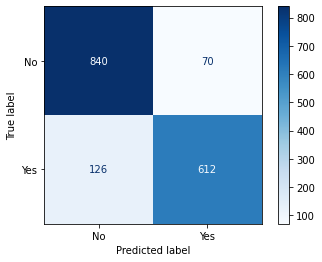

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
plot_confusion_matrix(model_boosting, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       910
         Yes       0.90      0.83      0.86       738

    accuracy                           0.88      1648
   macro avg       0.88      0.88      0.88      1648
weighted avg       0.88      0.88      0.88      1648



***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab10.ipynb file***
2.   ***Upload the lab10.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [1]:
!jupyter nbconvert --to html IS470_lab10.ipynb

[NbConvertApp] Converting notebook IS470_lab10.ipynb to html
[NbConvertApp] Writing 610835 bytes to IS470_lab10.html
